# 1. Zbiory danych


Zainstaluj potrzebne biblioteki:

`pip install numpy pandas matplotlib sklearn imgaug --user`


Do wczytywania zbiorów danych wykorzystamy bibliotekę Tensorflow.

Python 3.8: `pip install tf-nightly --user`

Python <=3.7: `pip install tensorflow --user`

## MNIST

"The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image."

http://yann.lecun.com/exdb/mnist/

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

len(x_train), len(x_test)


(60000, 10000)

8

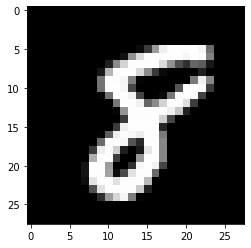

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[777], cmap='gray')
y_train[777]

## FMNIST

"Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

https://github.com/zalandoresearch/fashion-mnist

![FMNIST](https://www.surajx.in/images/fashion_random.png)

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

len(x_train), len(x_test)

(60000, 10000)

9

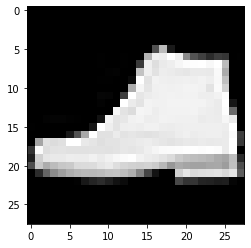

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[42], cmap='gray')
y_train[42]

## CIFAR-10

"The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images."

https://www.cs.toronto.edu/~kriz/cifar.html

![alt text](https://miro.medium.com/max/944/1*6XQqOifwnmplS22zCRRVaw.png)

In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

len(x_train), len(x_test)

(50000, 10000)

array([1], dtype=uint8)

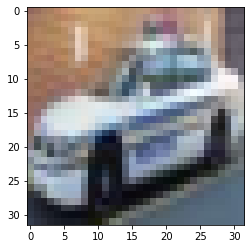

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1410])
y_train[1410]

## CIFAR-100

"This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each."

https://www.cs.toronto.edu/~kriz/cifar.html

In [7]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

len(x_train), len(x_test)

(50000, 10000)

## SmallNorb

"This database is intended for experiments in 3D object reocgnition from shape. It contains images of 50 toys belonging to 5 generic categories: four-legged animals, human figures, airplanes, trucks, and cars. The objects were imaged by two cameras under 6 lighting conditions, 9 elevations (30 to 70 degrees every 5 degrees), and 18 azimuths (0 to 340 every 20 degrees)."

https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/

![alt text](https://www.researchgate.net/profile/Hugo_Penedones/publication/330412104/figure/fig1/AS:715640818114567@1547633475277/The-NORB-dataset-with-objects-within-a-category-aligned-at-azimuth-zero.ppm)

## TNG

"This dataset contains all episodes of star trek TNG and has seperate rows for every speech or description that I found in the moviescripts."

https://github.com/RMHogervorst/TNG

# 2. Metody normalizacji danych

## Selekcja 

Przykładowa implementacja funkcji wybierającej *n* elementów (wierszy) z podanego zbioru danych w postaci tabelarycznej (pd.DataFrame).

In [8]:
import pandas as pd

def select_n(filename, n=1000):
    df = pd.read_csv(filename)
    return df.sample(n=n)

W przypadku gdy zbiorem danych jest macierz (np.array), traktujemy jej wiersze jako próbki (sample), a kolumny jako wektory cech.

In [9]:
from sklearn import preprocessing
import numpy as np

# data = [[height1, weight1],
#         [height2, weight2],
#         [height3, weight3]]

data_train = np.array([
  [163, 58],
  [150, 54],
  [175, 73],
  [186, 95],
  [149, 57],
  [162, 68],
  [177, 90],
  [181, 86],
  [163, 72],
])
data_test = np.array([
  [150, 54],
  [169, 64],
  [187, 82],
  [173, 90],
  [162, 70],
  [142, 60],
])

## Skalowanie

$ X' = \dfrac{X - \min(X)}{\max(X) - \min(X)} $

https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

In [10]:
scaler = preprocessing.MinMaxScaler().fit(data_train)
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[0.37837838, 0.09756098],
       [0.02702703, 0.        ],
       [0.7027027 , 0.46341463],
       [1.        , 1.        ],
       [0.        , 0.07317073],
       [0.35135135, 0.34146341],
       [0.75675676, 0.87804878],
       [0.86486486, 0.7804878 ],
       [0.37837838, 0.43902439]])

In [11]:
heights = data_train_scaled[:,0]
min(heights), max(heights)

(0.0, 1.0)

## Standaryzacja

Funkcja standaryzująca wartości wektorów cech

$ X' = \dfrac{X-\mu_X}{\sigma_X} $

wartość oczekiwana: $ \mu_{X'} = 0 $

odchylenie standardowe: $ \sigma_{X'} = 1 $

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In [12]:
scaler = preprocessing.StandardScaler().fit(data_train)
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[-0.34868716, -1.02689051],
       [-1.39474863, -1.30908943],
       [ 0.61690805,  0.03135544],
       [ 1.50203699,  1.58344949],
       [-1.4752149 , -1.09744024],
       [-0.42915342, -0.32139321],
       [ 0.77784058,  1.23070084],
       [ 1.09970565,  0.94850192],
       [-0.34868716, -0.03919429]])

In [13]:
data_train_scaled.mean(axis=0)  # should be [0., 0.]

array([-7.52484494e-16, -1.34922937e-16])

In [14]:
data_train_scaled.std(axis=0)  # should be [1., 1.]

array([1., 1.])

In [15]:
data_test_scaled = scaler.transform(data_test)
data_test_scaled

array([[-1.39474863, -1.30908943],
       [ 0.13411045, -0.60359213],
       [ 1.58250325,  0.666303  ],
       [ 0.45597551,  1.23070084],
       [-0.42915342, -0.18029375],
       [-2.03847877, -0.88579105]])

In [16]:
data_test_scaled.mean(axis=0)

array([-0.28163193, -0.18029375])

In [17]:
data_test_scaled.std(axis=0)

array([1.19298007, 0.88116584])

## Normalizacja

"Normalization is the process of scaling individual samples to have unit norm (vector length equal to 1)."

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization



In [18]:
scaler = preprocessing.Normalizer().fit(data_train)
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[0.94213358, 0.33523771],
       [0.94088741, 0.33871947],
       [0.92292082, 0.38498983],
       [0.890564  , 0.45485796],
       [0.93399032, 0.35729831],
       [0.92206337, 0.38703894],
       [0.89138513, 0.45324668],
       [0.90322915, 0.4291586 ],
       [0.91473484, 0.40405466]])

In [19]:
np.linalg.norm(data_train_scaled, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

## UCI Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=num&area=&numAtt=10to100&numIns=greater1000&type=&sort=attDown&view=table

Wczytujemy zbiór danych [Character Font Images Data Set](https://archive.ics.uci.edu/ml/datasets/Character+Font+Images?fbclid=IwAR2abp7ksO_B30IQP6vozDmbTyp4X0UcvZF8lV7rMWeKWtvqu3OqwdjAudY/) ze strony UCI.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def to_img(df):
  assert pd.unique(df['h']).size == 1
  assert pd.unique(df['w']).size == 1

  h, w = df['h'].iloc[0], df['w'].iloc[0]
  images = np.empty((len(df), w, h))

  for x in range(w):
    for y in range(h):
      label = 'r{}c{}'.format(y, x)
      images[:, y, x] = df[label].values
  return images

def plot_fonts(images, n_cols=10):
  n_rows = len(images) // n_cols + 1

  fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False)
  fig.set_size_inches(20, 2 * n_rows)
  
  for i, img in enumerate(images):
    ax = axes[i // n_cols][i % n_cols]
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_xticks([]); ax.set_yticks([])

  for i in range(len(images), n_rows * n_cols):
    axes[i // n_cols][i % n_cols].axis('off')

  plt.show()

In [21]:
times_df = select_n('./fonts/TIMES.csv')
roman_df = select_n('./fonts/ROMAN.csv')
times_img = to_img(times_df)
roman_img = to_img(roman_df)

# 3. Algorytm *k-nearest neighbors* (k-NN).




Implementacje metod opartych na wyszukiwaniu najbliższych sąsiadów można znaleźć w pakiecie **sklearn.neighbors**. Przedstawimy ich działanie na modelu, który rozróżnia bitmapy znaków czcionki Times vs. Roman.

Najpierw zobaczmy przykładowe znaki obu klas.

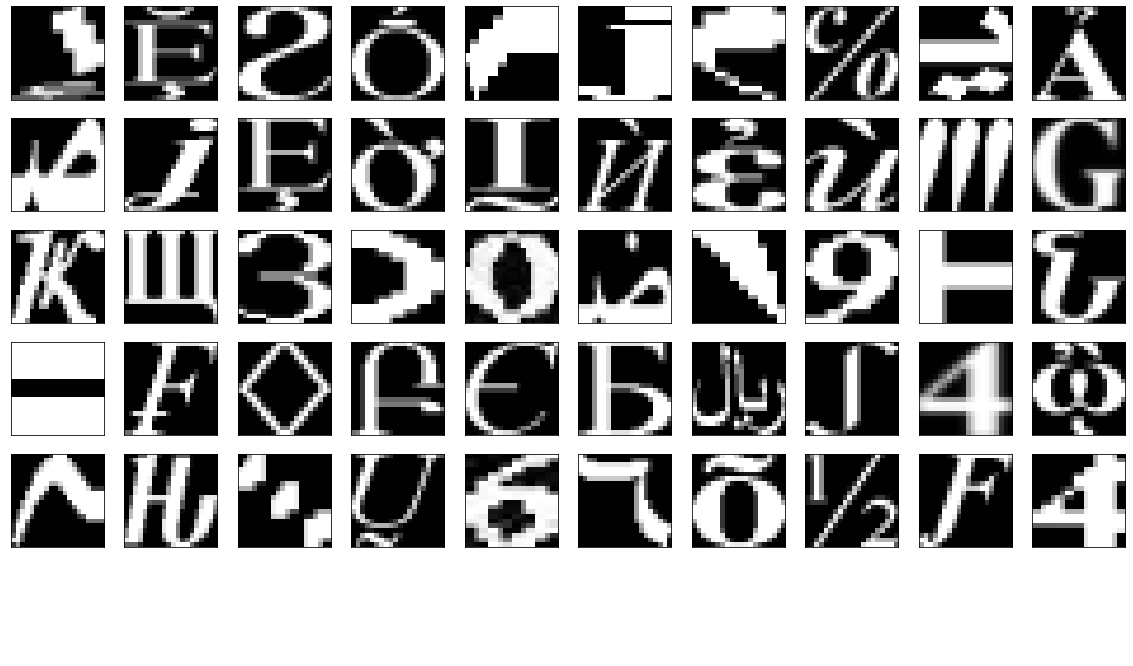

In [22]:
plot_fonts(times_img[:50])

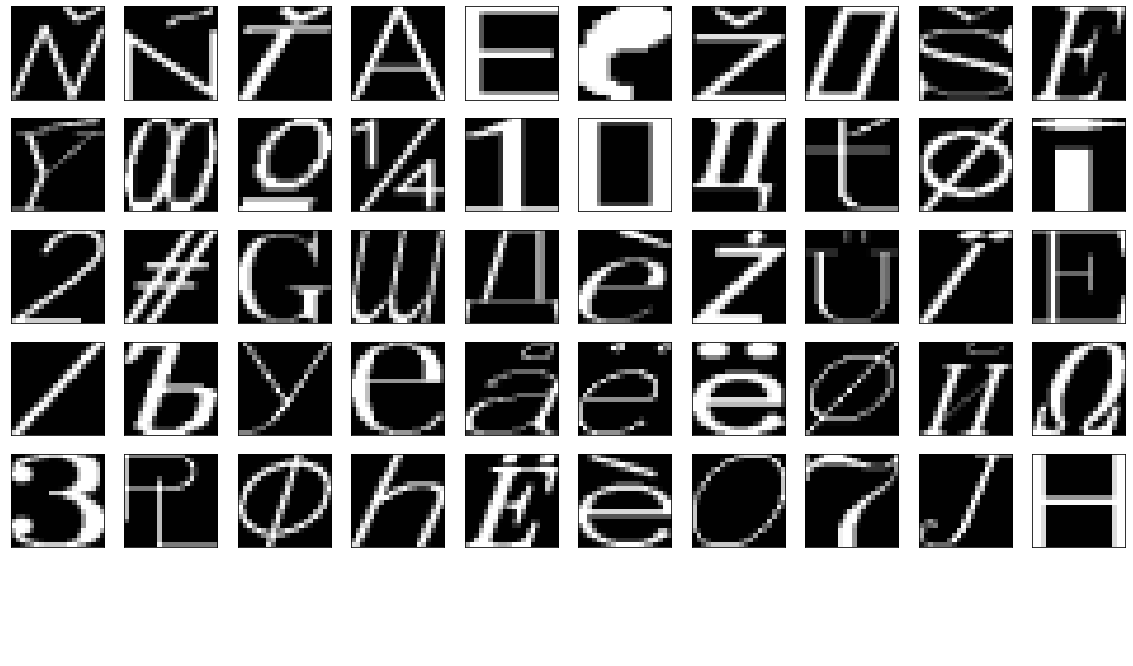

In [23]:
plot_fonts(roman_img[:50])

### **Wyznaczanie najbliższych sąsiadów.**
Można użyć klasy *NearestNeighbors*. Opiszemy ważniejsze parametry (poza liczbą sąsiadów *n_neighbors*):

**-> algorithm**: mamy do wyboru różne metody znajdowania sąsiadów. Dla zbioru treningowego M punktów (x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>d</sub>):

  - metoda *brute* wyznacza dla każdego punktu jego odległość od wszystkich pozostałych. 
    - złożoność czasowa: __O(d * M^2)__
 
  - metoda *kd_tree* tworzy drzewo binarne, rekurencyjnie dzieląc zbiór treningowy na podzbiory nierównościami typu x<sub>i</sub> <= a<sub>j</sub>, gdzie a<sub>j</sub> jest ustalane w oparciu o dane. 
    - złożoność czasowa: dla małych wymiarów D (np. < 20) w przybliżeniu __O(d \* M \* log(M))__, dla większych zbliża się do  __O(d \* M^2)__

- metoda *ball_tree* również tworzy drzewo binarne, ale podzbiór odpowiadający danemu węzłowi nie jest dzielony na dwoje w oparciu o wartość pojedynczej cechy jak dla *kd_tree*. Zamiast tego do podzbioru dopasowywane są 2 d-wymiarowe kule, do których przyporządkowuje się punkty tego podzbioru - w wyniku tego powstają 2 podzbiory (niższe węzły drzewa)
  - złożoność czasowa: średnio __O(d \* M \* log(M))__

- metoda *auto* wybiera najlepszy algorytm z powyższych zależnie od danych w zbiorze treningowym
- więcej szczegółów i wskazówki dot. wyboru parametrów można znaleźć [ tutaj ](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)

**-> metric**: standardowo odległość Euklidesowa (metryka Minkowskiego z p=2), można przekazać dowolną funkcję z **sklearn.neighbors.DistanceMetric**

**-> p**: wartość p dla metryki Minkowskiego

**-> n_jobs**: liczba używanych procesów

Wyznaczymy teraz najbliższych sąsiadów w załadowanym zbiorze. Tworzymy w tym celu 2-wymiarową tablicę X i wektor odpowiedzi y.

In [24]:
from sklearn.neighbors import NearestNeighbors

assert times_img.shape[1:] == roman_img.shape[1:]

w, h = times_img.shape[1:]
X = np.concatenate([times_img, roman_img])
X = X.reshape((X.shape[0], -1))
y = np.concatenate([np.zeros(len(times_img)), np.ones(len(roman_img))])

invalid_samples = np.any(np.isnan(X), axis=1)
X = X[~invalid_samples]
y = y[~invalid_samples]

Dopasowujemy *Ball Tree* do danych.

In [25]:
k = 50
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)

Wybierzmy przykładowy obrazek i sprawdźmy, jak wyglądają jego najbliżsi sąsiedzi.

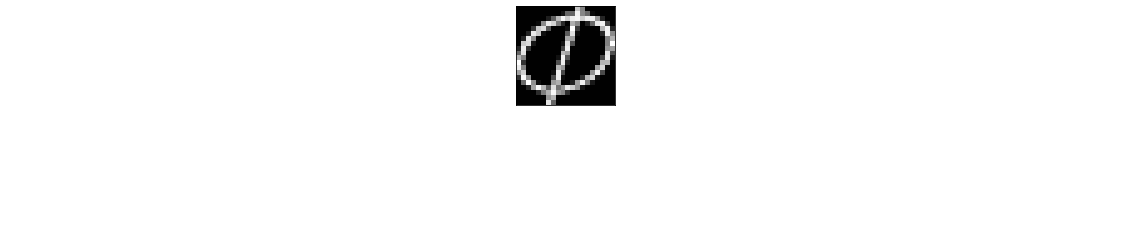

In [26]:
target_ind = len(times_img) + 42
target_img = X[target_ind].reshape((1, w, h))
plot_fonts(target_img, n_cols=1)

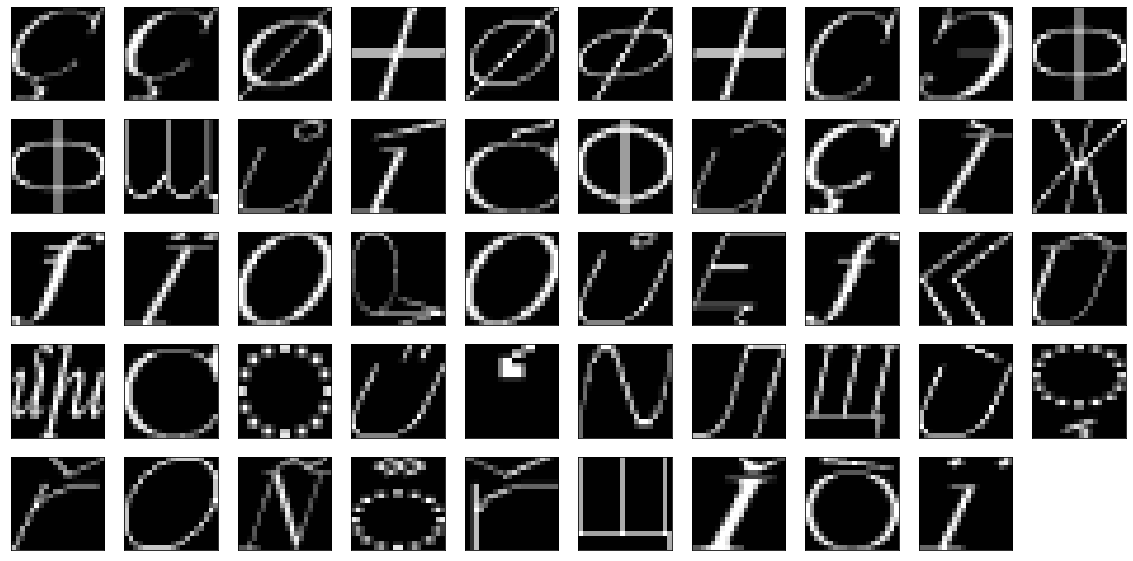

In [27]:
distances, indices = nbrs.kneighbors(target_img.reshape(1, -1))
neighbor_inds = indices[0][1:]  # indices[0][0] is target_img index

neighbors = X[neighbor_inds].reshape((k - 1, w, h))
plot_fonts(neighbors, n_cols=10)

Jak widać, najbliżsi sąsiedzi faktycznie odpowiadają wybranemu obrazkowi, dalsi niekoniecznie.

### **Klasyfikacja.**
Można użyć klasy *KNeighborsClassifier*. Do dyspozycji mamy te parametry co poprzednio, a także parametr *weights*. Domyślnie wagi są sobie równe, podanie wartości *distance* zmniejsza je wraz z ze wzrostem odległości.

Sprawdzimy, jak nasz klasyfikator poradzi sobie z odróżnianiem znaków czcionki Arial od znaków czcionki Consolas.
W tym celu dzielimy zbiór X na zbiory treningowy i testowy. Najpierw jednak zmniejszamy rozmiar zbioru, aby skrócić czas działania.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

sub_size = int(len(X) * 0.1)
X_sub, y_sub = resample(X, y, n_samples=sub_size, replace=False, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.4, random_state=0)

Następnie dopasowujemy klasyfikator do zbioru treningowego i sprawdzamy odsetek poprawnych predykcji na zbiorze testowym.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
y_pred = neigh.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.725

Wynik jest zaskakująco wysoki. W następnym kroku chcielibyśmy sprawdzić, czy da się go poprawić, modyfikując hiperparametry modelu (przede wszystkim liczbę sąsiadów k).

# 4. *Cross-validation*.

Jeśli jako ostateczne wybierzemy hiperparametry, dla których model uzyskuje najlepszą wartość metryki na zbiorze testowym, to wynik ten prawdopodobnie będzie lepszy niż wynik dla danych, z którymi model nie miał styczności. Inaczej mówiąc, model ten jest "dopasowany" do konkretnego zbioru testowego.

Z tego powodu dane można podzielić na zbiór treningowy, walidacyjny i testowy, np. w proporcji 60:20:20, i ostateczne hiperparametry wybrać w oparciu o wynik na zbiorze walidacyjnym. Wynik na zbiorze testowym daje zaś wiarygodne oszacowanie jakości modelu dla nowych danych.

Powoduje to jednak znaczne zmniejszenie zbioru treningowego, co może zmniejszyć wiarygodność rezultatu. Przeciwdziałamy temu, stosując cross-validation. 

Dla przykładu, *k*-krotna cross-walidacja polega na podzieleniu danych na zbiór cross-walidacyjny i testowy, np. w proporcji 80:20. Następnie, zbiór cross-walidacyjny dzieli się na k części. Jedną z nich traktuje się jako zbiór walidacyjny, a pozostałe łącznie - jako treningowy. Na tych danych trenuje się i waliduje model z ustalonymi hiperparametrami. Ta procedura jest wykonywana k-krotnie, za każdym razem wybieramy inną część jako zbiór walidacyjny. 

Uzyskuje się w ten sposób k wartości metryki, które można uśrednić, uzyskując bardziej wiarygodny wynik dla danych hiperparametrów. Jako ostateczne wybiera się hiperparametry, dla których uzyskana średnia była najlepsza. 

Dla przykładu, wyznaczamy wartości *accuracy* dopasowanego modelu w 5-krotnej cross-walidacji.

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.625     , 0.66666667, 0.66666667, 0.75      , 0.83333333])

# 5. Wpływ hiperparametrów i rozmiaru zbioru treningowego na jakość klasyfikatora.

Zbadamy teraz wpływ hiperparametrów takich jak liczba sąsiadów k i użyte wagi na wynik cross-validacji dla modelu k-NN. Sprawdzimy również, jakie znaczenie ma rozmiar zbioru treningowego w stosunku do rozmiaru zbioru testowego.



In [32]:
def check(X, y, fraction=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    sub_size = int(len(X_train) * fraction)
    X_train, y_train = resample(X_train, y_train, n_samples=sub_size, replace=False, random_state=0)

    model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return model, accuracy_score(y_true=y_test, y_pred=y_pred)

In [33]:
check(X, y)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 0.71125)

In [34]:
check(X, y, fraction=0.5)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 0.7625)

Bardzo użyteczna jest klasa *GridSearchCV*, której można użyć do przeprowadzenia cross-walidacji dla wielu różnych kombinacji hiperparametrów.

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
  'n_neighbors': (2, 3, 5),
  'weights': ('uniform', 'distance')
}
knn = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn, params)

sub_size = int(len(X) * 0.1)
X_sub, y_sub = resample(X, y, n_samples=sub_size, replace=False, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.4, random_state=0)

clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (2, 3, 5),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Po wykonaniu metody *fit* mamy dostęp do wyników cross-walidacji dla poszczególnych zestawów hiperparametrów, a także do najlepszego spośród nich.


In [36]:
def grid_cv_table(cv_results):
    param_cols = pd.DataFrame(clf.cv_results_['params'])
    score_cols = pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['eval_score'])
    est_df = pd.concat([param_cols, score_cols], axis=1)
    return est_df.set_index(clf.cv_results_['rank_test_score']).sort_index()

grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,5,distance,0.733333
2,5,uniform,0.725000
3,3,distance,0.716667
4,2,uniform,0.708333
4,3,uniform,0.708333
6,2,distance,0.633333


In [37]:
clf.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

Można użyć najlepszych znalezionych hiperparametrów do określenia *accuracy* na zbiorze testowym.

In [38]:
y_pred_best = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred_best)

0.775

### Inne miary jakości w klasyfikacji


Klasycznym przykładem niedoskonałości *accuracy* jako miary jakości klasyfikatora jest problem niezrównoważonych klas. Jeśli 99% zbioru testowego stanowią przykłady klasy 0, a tylko 1% klasy 1, to klasyfikator zwracający zawsze 0 osiąga dokładność 99%.

Wprowadza się więc miary *precision* i *recall*, definiowane następująco:

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN},$

gdzie:
 - TP to liczba *true positives*, czyli przykładów klasy 1, które zostały poprawnie zaklasyfikowane jako 1,
 - FP to liczba *false positives* (zaklasyfikowane jako 1, naprawdę klasy 0),
 - FN to liczba *false negatives* (zaklasyfikowane jako 0, naprawdę klasy 1).

Wysokie *precision* oznacza, że duży odsetek pozytywnych predykcji naszego klasyfikatora jest poprawny (w powyższym przykładzie jest niezdefiniowane - brak pozytywnych predykcji). Wysokie *recall*, że niewiele przykładów, które faktycznie są pozytywne mu "umyka" (daje predykcję 0) (w powyższym przykładzie 0%).

Aby zbalansować obie te wielkości, stosuje się F1 score, zdefiniowany jako

$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

Żeby przyjmował duże wartości, zarówno *precision* jak i *recall* muszą być wysokie.


In [39]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test, y_pred=y_pred_best)

0.8085106382978724

Sprawdźmy jeszcze, czy model najlepszy pod względem *accuracy* jest też najlepszy pod względem F1.

In [40]:
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score)
clf = GridSearchCV(knn, params, scoring=f1_scorer)
clf.fit(X_train, y_train)
grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,5,distance,0.774861
2,5,uniform,0.768950
3,3,distance,0.754010
4,3,uniform,0.748952
5,2,uniform,0.693333
6,2,distance,0.666709


# 6. Augumentacja danych.

Stwórzmy prostą funkcję, która będzie dodawała szum do przekazanego jej obrazka.

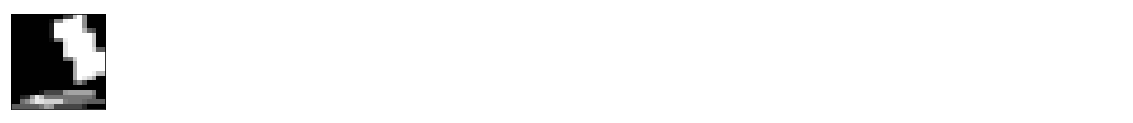

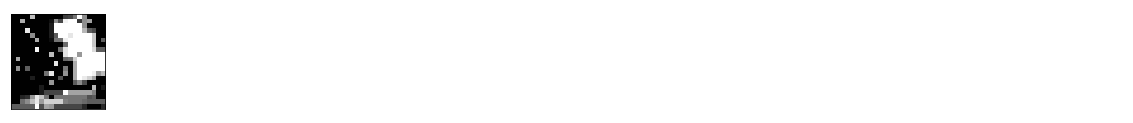

In [41]:
def salt_and_pepper(image, percent=0.05):
    h, w = image.shape
    pixels = np.random.randint(0, w * h, int(percent * w * h))
    for p in pixels:
        image[p // w][p % w] = np.random.randint(0, 256)
    return image

plot_fonts([times_img[0]])
plot_fonts([salt_and_pepper(np.copy(times_img[0]), percent=0.1)])

In [42]:
from sklearn.utils import shuffle

X = np.concatenate([times_img, roman_img])
y = np.concatenate([np.zeros(len(times_img)), np.ones(len(roman_img))])

sub_size = int(len(X) * 0.5)
X_sub, y_sub = resample(X, y, n_samples=sub_size, replace=False, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.4, random_state=0)

X_train_a = np.copy(X_train)
for train in X_train_a:
    salt_and_pepper(train, percent=0.05)

y_train_a = y_train

X_train_aug = np.concatenate([X_train, X_train_a])
y_train_aug = np.concatenate([y_train, y_train_a])

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

X_test = X_test.reshape((X_test.shape[0], -1))
X_train_aug = X_train_aug.reshape((X_train_aug.shape[0], -1))

params = {
  'n_neighbors': (2, 3, 5),
  'weights': ('uniform', 'distance')
}
knn = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn, params)
clf.fit(X_train_aug, y_train_aug)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (2, 3, 5),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,2,distance,0.940000
2,3,distance,0.936667
3,5,distance,0.884167
4,2,uniform,0.881667
5,5,uniform,0.825000
6,3,uniform,0.820000


In [44]:
y_pred_best = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred_best)

0.7925

In [45]:
f1_score(y_true=y_test, y_pred=y_pred_best)

0.8134831460674157

# 7. Procedury augumentacyjne z biblioteki imgaug.

"This python library helps you with augmenting images for your machine learning projects. It converts a set of input images into a new, much larger set of slightly altered images."

https://github.com/aleju/imgaug

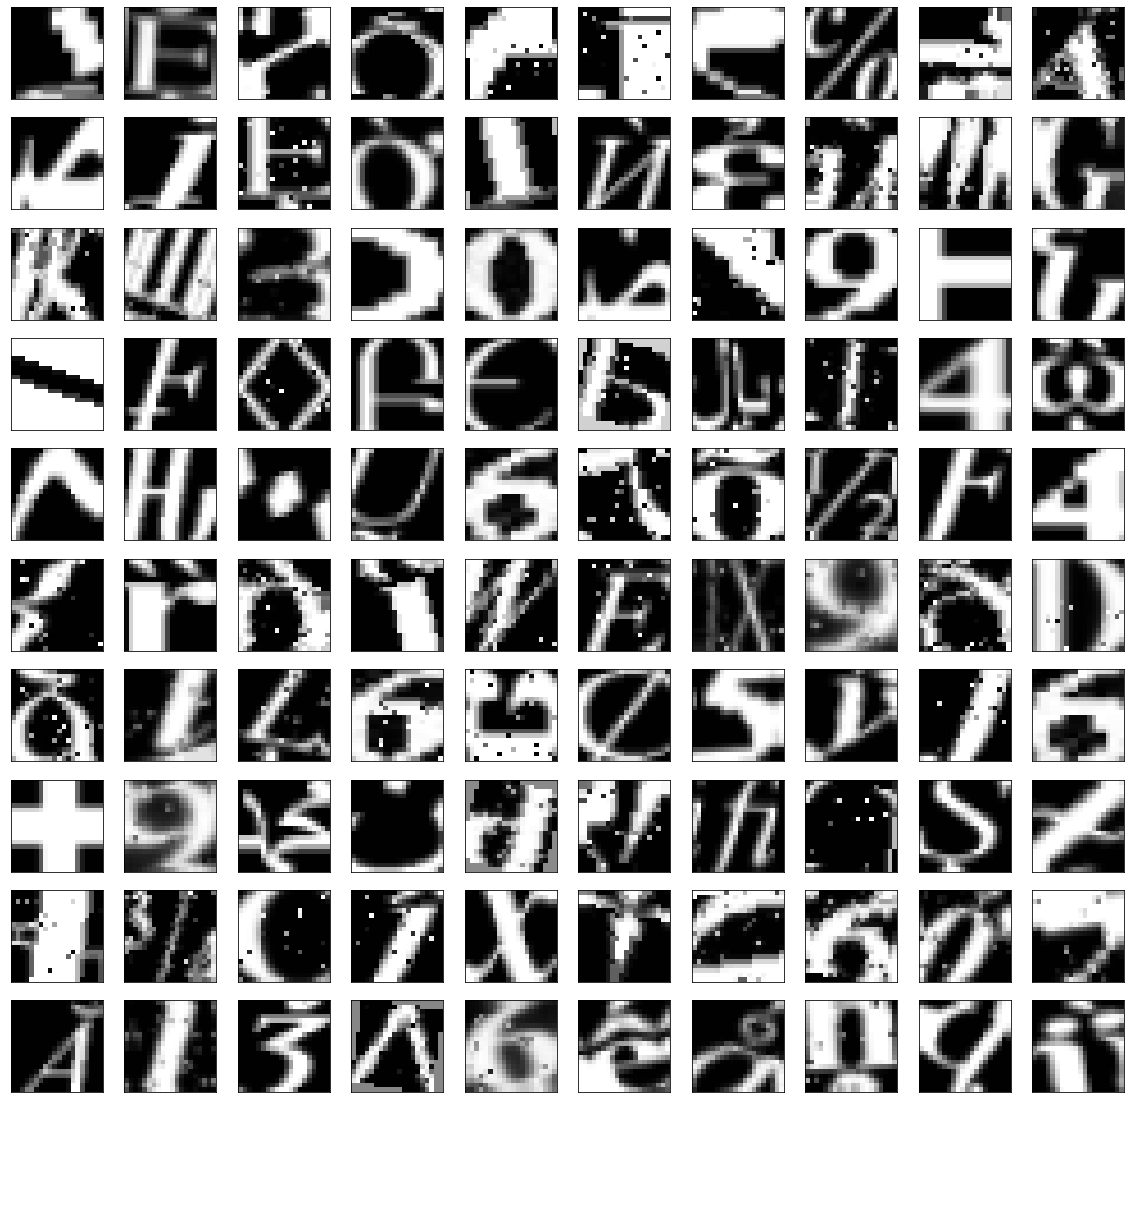

In [46]:
import imgaug as ia
import imgaug.augmenters as iaa

N = 100

def augment(images):
    seq = iaa.Sequential(
        [
            iaa.Crop(px=(1, 2), keep_size=True),
            iaa.SomeOf((0, 3),
                [
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        rotate=(-20, 20),
                        order=[0, 1],
                        cval=(0, 255),
                        mode=ia.ALL,
                    ),
                    iaa.GaussianBlur((0, 0.5)),
                    iaa.SaltAndPepper(0.05),
                ],
                random_order=True
            )
        ]
    )

    imagesX = images[:, :, :, np.newaxis]
    images_aug = seq(images=imagesX)
    return [np.squeeze(img) for img in images_aug]

times_aug = augment(times_img[:N])
plot_fonts(times_aug)

Sprawdźmy, czy zdołamy uzyskać lepszy wynik klasyfikacji, jeśli wytrenujemy model po augmentacji obu klas.

In [47]:
from sklearn.utils import shuffle

X = np.concatenate([times_img, roman_img])
y = np.concatenate([np.zeros(len(times_img)), np.ones(len(roman_img))])

sub_size = int(len(X) * 0.5)
X_sub, y_sub = resample(X, y, n_samples=sub_size, replace=False, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.4, random_state=0)

X_train_a = augment(X_train)
y_train_a = y_train

X_train_aug = np.concatenate([X_train, X_train_a])
y_train_aug = np.concatenate([y_train, y_train_a])

X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

X_test = X_test.reshape((X_test.shape[0], -1))
X_train_aug = X_train_aug.reshape((X_train_aug.shape[0], -1))

In [48]:
params = {
  'n_neighbors': (2, 3, 5),
  'weights': ('uniform', 'distance')
}
knn = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn, params)
clf.fit(X_train_aug, y_train_aug)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (2, 3, 5),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,2,distance,0.821667
2,2,uniform,0.805833
3,5,distance,0.801667
4,5,uniform,0.799167
5,3,uniform,0.792500
5,3,distance,0.792500


In [50]:
y_pred_best = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred_best)

0.7875

In [51]:
f1_score(y_true=y_test, y_pred=y_pred_best)

0.8081264108352145

# 8. Projekt
Wykonać punkty 6 i 7 na zbiorach MNIST, FMNIST przy pomocy imgaug oraz tworząc obrazki dodatkowe poprzez zaburzenie danych (np. dla x% pikseli losować liczbę 0,1 (MNIST), i odpowiednią – stopień szarości - dla zbioru FMNIST).


a) Wczytaj zbiór danych MNIST (np. korzystając z biblioteki Tensorflow).

In [52]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

b) Wybierz 0.03 danych treningowych oraz 0.01 danych testujących.

In [54]:
sub_train_size = int(len(x_train) * 0.03)
sub_test_size = int(len(x_test) * 0.01)
X_train, Y_train = resample(x_train, y_train, n_samples=sub_train_size, replace=False, random_state=0)
X_test, Y_test = resample(x_test, y_test, n_samples=sub_test_size, replace=False, random_state=0)
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0],-1))

c) Stwórz klasyfikator k-NN dla zbioru danych.

In [55]:
params = {
  'n_neighbors': (2, 3, 5),
  'weights': ('uniform', 'distance')
}

knn = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn, params)
clf.fit(X_train, Y_train)
grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,5,distance,0.903889
2,3,distance,0.902222
3,3,uniform,0.898889
4,5,uniform,0.896111
5,2,distance,0.895556
6,2,uniform,0.882222


d) Oblicz accuracy oraz F1 score dla klasyfikatora.

In [62]:
y_pred_best = clf.predict(X_test)

accuracy = accuracy_score(y_true = Y_test, y_pred = y_pred_best)

f1 = f1_score(y_true = Y_test, y_pred = y_pred_best, average = None)

print('accuracy: ', accuracy)
print('F1_score for each class as possitive:\n', f1)

accuracy:  0.9
F1_score for each class as possitive:
 [1.         0.90909091 0.88888889 0.83333333 0.96551724 0.875
 1.         0.89655172 0.77777778 0.77777778]


e) Dokonaj augumentacji zbioru danych korzystając z różnych funkcji biblioteki imgaug (crop, rotation, gaussian blur, salt and pepper). Porównaj miary jakości.

In [66]:
def augment(images):
    seq = iaa.Sequential(
        [
            iaa.Crop(px=(1, 2), keep_size=True),
            iaa.SomeOf((0, 3),
                [
                    iaa.Affine(
                        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                        rotate=(-20, 20),
                        order=[0, 1],
                        cval=(0, 255),
                        mode=ia.ALL,
                    ),
                    iaa.GaussianBlur((0, 0.7)),
                    iaa.SaltAndPepper(0.12),
                ],
                random_order=True
            )
        ]
    )

    imagesX = images[:, :, :, np.newaxis]
    images_aug = seq(images=imagesX)
    return [np.squeeze(img) for img in images_aug]

X_train_reshaped = X_train.reshape((X_train.shape[0],28,28))
X_train_aug_reshaped = augment(X_train_reshaped)

X_train_aug = np.asarray(X_train_aug_reshaped).reshape(X_train.shape)

# polaczenie poczatkowych danych z zaszumionymi
X_train_conc = np.concatenate([X_train, X_train_aug])
Y_train_conc = np.concatenate([Y_train, Y_train])

X_train_conc, Y_train_conc = shuffle(X_train_conc, Y_train_conc)

In [67]:
knn_aug = KNeighborsClassifier(algorithm='auto')
clf_aug = GridSearchCV(knn_aug, params)
clf_aug.fit(X_train_conc, Y_train_conc)
grid_cv_table(clf_aug.cv_results_)

,n_neighbors,weights,eval_score
1,5,distance,0.903889
2,3,distance,0.902222
3,3,uniform,0.898889
4,5,uniform,0.896111
5,2,distance,0.895556
6,2,uniform,0.882222


In [68]:
y_pred_best_aug = clf_aug.predict(X_test)
accuracy = accuracy_score(y_true = Y_test, y_pred = y_pred_best_aug)
f1 = f1_score(y_true = Y_test, y_pred = y_pred_best_aug, average = None)

print('accuracy: ', accuracy)
print('F1_score for each class as possitive:\n', f1)

accuracy:  0.91
F1_score for each class as possitive:
 [0.94736842 0.95238095 0.88888889 0.72727273 0.92857143 0.93333333
 0.94736842 0.93333333 0.9        0.84210526]




f) Wykonaj kroki a-e dla zbioru danych FMNIST (fashion_mnist).

In [69]:
#a) Wczytaj zbiór danych MNIST (np. korzystając z biblioteki Tensorflow).
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [70]:
# b) wybor 0.03 danych treningowych i 0.01 danych testowych

sub_train_size = int(len(x_train)*0.03)
sub_test_size = int(len(x_train)*0.01)

X_train, Y_train = resample(x_train, y_train, n_samples=sub_train_size, replace=False, random_state=0)
X_test, Y_test = resample(x_test, y_test, n_samples=sub_test_size, replace=False, random_state=0)


X_train_reshaped = X_train.reshape((X_train.shape[0],-1))
X_test_reshaped = X_test.reshape((X_test.shape[0],-1))

In [71]:
# c) stworzenie klasyfikatora k-NN
params = {
  'n_neighbors': (2, 3, 5),
  'weights': ('uniform', 'distance')
}
knn = KNeighborsClassifier(algorithm='auto')
clf = GridSearchCV(knn, params)
clf.fit(X_train_reshaped, Y_train)
grid_cv_table(clf.cv_results_)

,n_neighbors,weights,eval_score
1,3,distance,0.776667
2,3,uniform,0.776111
3,5,distance,0.775556
4,5,uniform,0.774444
5,2,uniform,0.763889
6,2,distance,0.761667


In [73]:
# d) pomiar jakosci

y_pred_best = clf.predict(X_test_reshaped)
accuracy = accuracy_score(y_true = Y_test, y_pred = y_pred_best)
f1 = f1_score(y_true = Y_test, y_pred = y_pred_best, average = None)

print('accuracy: ', accuracy)
print('F1_score for each class as possitive:\n', f1)

accuracy:  0.7983333333333333
F1_score for each class as possitive:
 [0.75806452 0.95412844 0.7079646  0.87769784 0.64912281 0.81904762
 0.43809524 0.90625    0.88135593 0.91034483]


In [75]:
# e) augmentacja danych (salt and pepper)

X_train_aug = np.copy(X_train)
for i in range(X_train_aug.shape[0]):
    for j in range(X_train_aug.shape[1]):
        for k in range(X_train_aug.shape[2]):
            if np.random.rand() < 0.15:
                X_train_aug[i][j][k] = np.random.randint(0,256)
            
# polaczenie pierwotnych danych z zaszumionymi
X_train_conc = np.concatenate([X_train, X_train_aug])
Y_train_conc = np.concatenate([Y_train, Y_train])

# przetasowanie 
X_train_conc, Y_train_conc = shuffle(X_train_conc, Y_train_conc)

# stworzenie klasyfikatora
knn_aug = KNeighborsClassifier(algorithm='auto')
clf_aug = GridSearchCV(knn_aug, params)
clf_aug.fit(X_train_conc.reshape((X_train_conc.shape[0], -1)), Y_train_conc)
grid_cv_table(clf_aug.cv_results_)

,n_neighbors,weights,eval_score
1,3,distance,0.776667
2,3,uniform,0.776111
3,5,distance,0.775556
4,5,uniform,0.774444
5,2,uniform,0.763889
6,2,distance,0.761667


In [76]:
# pomiary jakosci

y_pred_best_aug = clf_aug.predict(X_test_reshaped)
accuracy = accuracy_score(y_true = Y_test, y_pred = y_pred_best_aug)
f1 = f1_score(y_true = Y_test, y_pred = y_pred_best_aug, average = None)

print('accuracy: ', accuracy)
print('F1_score for each class as possitive:\n', f1)

accuracy:  0.7883333333333333
F1_score for each class as possitive:
 [0.72881356 0.97297297 0.66055046 0.86524823 0.66071429 0.82242991
 0.41071429 0.90625    0.88888889 0.89655172]
